In [1]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
from random import uniform # Draw samples from a uniform distribution
import requests
from pprint import pprint
from config import apikey
import numpy as np

In [2]:
#Initialize list variables which will store weather data
cities = []
weather = []
citylat = []
citylong = []
countries = []
temprature = []
humidity = []
cloudiness = []
wind_speed = []
cnt = 0
random_cities_weather_data_file = "random_cities_weather_data_file.csv"

In [3]:
#build base url for Openweather API with api key 
api_url = "http://api.openweathermap.org/data/2.5/weather?"
base_url = api_url + "appid=" + apikey 


In [4]:
def getweather_data(city_name,country_code):
    url = base_url + "&q=" + city_name + "," + country_code + "&units=imperial"
    city_weather_data_response = requests.get(url)
    city_weather_data = city_weather_data_response.json()
    city_temp = city_weather_data["main"]["temp"]
    city_wind_speed = city_weather_data["wind"]["speed"]
    city_cloudiness = city_weather_data["clouds"]["all"]
    city_humidity = city_weather_data["main"]["humidity"]
    return city_temp,city_wind_speed,city_cloudiness,city_humidity

In [5]:
while cnt < 600:
    long = round(uniform(-180,180),7)              #longitude ranges is from -180 to 180
    lat = round(uniform(-90, 90),7)                #latitude ranges is from -90 to 90
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code
    url = base_url + "&q=" + city_name + "," + country_code + "&units=imperial"
    city_weather_data_response = requests.get(url)
    city_weather_data = city_weather_data_response.json()
    if city_weather_data["cod"] != "404":  
        city_temp = city_weather_data["main"]["temp"]
        city_wind_speed = city_weather_data["wind"]["speed"]
        city_cloudiness = city_weather_data["clouds"]["all"]
        city_humidity = city_weather_data["main"]["humidity"]
        #city_temp,city_wind_speed,city_cloudiness,city_humidity = getweather_data(city_name,country_code)
        temprature.append(city_temp) 
        humidity.append(city_humidity)
        cloudiness.append(city_cloudiness)
        wind_speed.append(city_wind_speed)
        cities.append(city_name)
        citylat.append(lat)
        citylong.append(long)
        countries.append(country_code)
        print(f'Collecting Weather Information for city :{city_name} City Number :{cnt}')
        cnt += 1
    else:
        print("City Not Found... skipping")
    
    

City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


City Not Found... skipping
City Not Found... skipping
City Not Found... skipping


In [6]:
#Create dataframe on city weather data
weather_dict = {"City_Name": cities,
                "Country_Code": countries,
                "Latitude": citylat,
                "Longititude": citylong,
                "Temprature": temprature,
                "Humidity" : humidity,
                "cloudiness": cloudiness,
                "wind_speed": wind_speed}
weather_df = pd.DataFrame(weather_dict)

In [7]:
weather_df.to_csv(random_cities_weather_data_file)

In [8]:
weather_df.head(4)

,City_Name,Country_Code,Latitude,Longititude,Temprature,Humidity,cloudiness,wind_speed
0,anadyr,ru,61.586389,172.522532,26.6,92,72,4.47
1,punta arenas,cl,-68.817461,-83.113115,41.0,86,72,8.05
2,kloulklubed,pw,4.846910,132.393647,80.6,83,90,5.82
3,ushuaia,ar,-53.972004,-54.904854,41.0,86,75,5.82


# Part I - WeatherPy
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.
#### Latitude vs. Temperature Plot

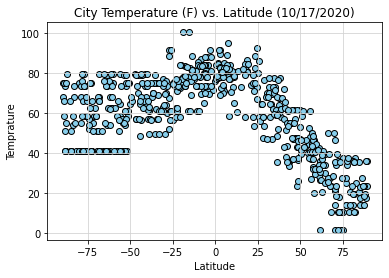

In [9]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Temprature"]
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("City Temperature (F) vs. Latitude (10/17/2020)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVstemp.png")
plt.show()

#### Latitude vs. Humidity

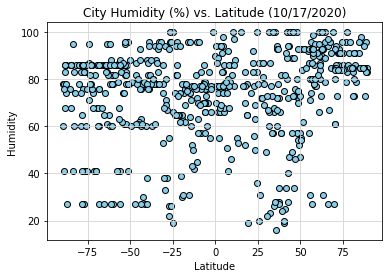

In [10]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Humidity (%) vs. Latitude (10/17/2020)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVshumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

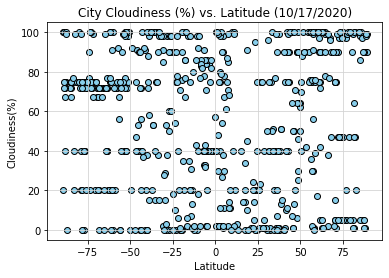

In [11]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Cloudiness (%) vs. Latitude (10/17/2020)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVsclouddiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

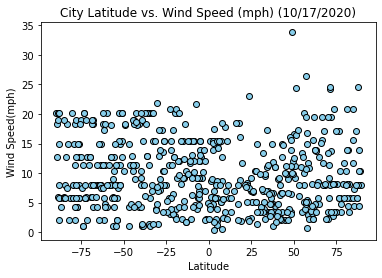

In [12]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["wind_speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed (mph) (10/17/2020)")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVswind.png")
plt.show()